# Network visualization

In [1]:
import networkx as nx
import pandas as pd
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter, defaultdict

In [2]:
netsci_coauthor_net = nx.read_gml('../../../datasets/s4/netscience.gml')

In [3]:
netsci_lcc_net = netsci_coauthor_net.subgraph(max(nx.connected_components(netsci_coauthor_net), key=len))

Previous, we have covered some elements of network visualiztion like:
    
- Setting node size by some type of centrality measures, or other nodal-level numericals;
- Setting node color by community assignment, or other nodal-level categorical variables;

Before doint these, a crucial step is find a nice layout of a graph -- where to each node in the 2-d space. NetworkX provides different layout algorithms: https://networkx.org/documentation/stable/reference/drawing.html#module-networkx.drawing.layout

We will use the [spring layout](https://networkx.org/documentation/stable/reference/generated/networkx.drawing.layout.spring_layout.html#networkx.drawing.layout.spring_layout):

In [4]:
netsci_pos = nx.spring_layout(netsci_lcc_net)

It returns a dict containing xy coordinates of nodes:

In [5]:
netsci_pos['NEWMAN, M']

array([-0.06741562, -0.44294568])

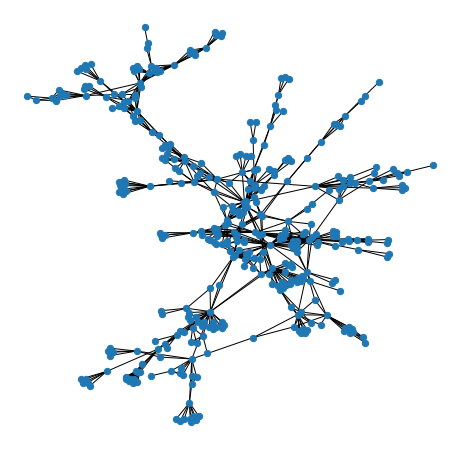

In [10]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1, 1, 1)
nx.draw(netsci_lcc_net, 
        ax=ax,
        pos=netsci_pos, # specify node positions
        node_size=40,
        with_labels=False, 
       )

The next step is to set node size:

In [11]:
netsci_degree = nx.degree_centrality(netsci_lcc_net)

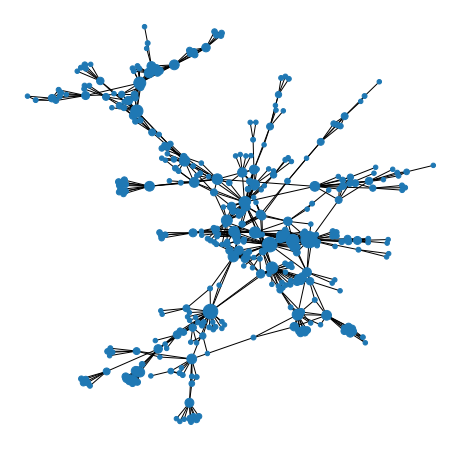

In [13]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1, 1, 1)
nx.draw(netsci_lcc_net, 
        ax=ax,
        pos=netsci_pos, # specify node positions
        node_size=[max(3000*netsci_degree[n], 20) for n in list(netsci_lcc_net)], # based on degree centrality
        with_labels=False, 
       )

Then set node color:

In [14]:
import community as community_louvain

In [19]:
netsci_louvain = community_louvain.best_partition(netsci_lcc_net)

A little function to order nodes based on their community membership:

In [25]:
def order_nodes(node_to_comm):
    """"""
    # reverse
    comm_nodes = defaultdict(list)
    for node, comm in node_to_comm.items():
        comm_nodes[comm].append(node)
    n_comm = len(comm_nodes)
    print('Number of communities', n_comm)
    # sort community by size
    comm_by_size = sorted(comm_nodes, key=lambda x: len(comm_nodes[x]), reverse=True)
    return n_comm, [n for comm in comm_by_size for n in comm_nodes[comm]]

In [26]:
ncomm_louvain, nodelist_louvain = order_nodes(netsci_louvain)

Number of communities 18


In [36]:
cmap = cm.get_cmap('plasma', ncomm_louvain) # viridis, tab20b, 

[List of Colormaps in Matplotlib](https://matplotlib.org/stable/tutorials/colors/colormaps.html)

In [37]:
sns.color_palette([cmap(n) for n in range(ncomm_louvain)])

[(0.050383, 0.029803, 0.527975),
 (0.186213, 0.018803, 0.587228),
 (0.287076, 0.010855, 0.627295),
 (0.381047, 0.001814, 0.653068),
 (0.471457, 0.005678, 0.659897),
 (0.557243, 0.047331, 0.643443),
 (0.636008, 0.112092, 0.605205),
 (0.706178, 0.178437, 0.553657),
 (0.76809, 0.244817, 0.498465),
 (0.823132, 0.311261, 0.444806),
 (0.872303, 0.378774, 0.393355),
 (0.915471, 0.448807, 0.34289),
 (0.951344, 0.52285, 0.292275),
 (0.977856, 0.602051, 0.241387),
 (0.992541, 0.68703, 0.19217),
 (0.992505, 0.777967, 0.152855),
 (0.974443, 0.874622, 0.144061),
 (0.940015, 0.975158, 0.131326)]

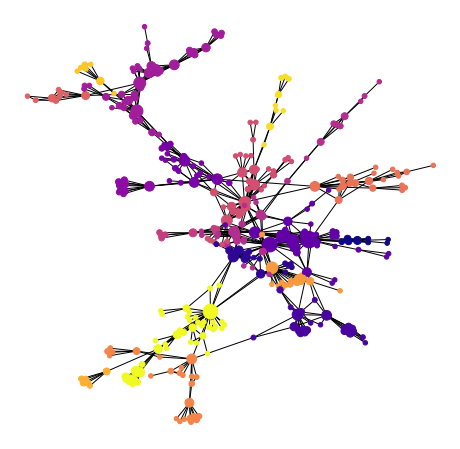

In [38]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1, 1, 1)
nx.draw(netsci_lcc_net, 
        ax=ax,
        pos=netsci_pos, # specify node positions
        node_size=[max(3000*netsci_degree[n], 20) for n in list(netsci_lcc_net)], # based on degree centrality
        with_labels=False, 
        node_color=[netsci_louvain[n] for n in list(netsci_lcc_net)],
        cmap=cmap,
       )

Try different configurations of layout, node size and color.

1 viridis
2 plasma
3 tab20b
4 gnuplot


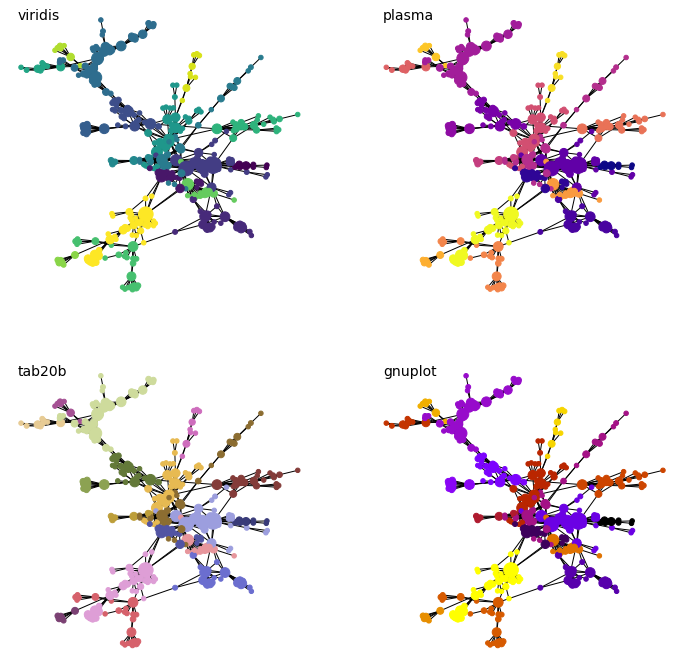

In [40]:
def color_show():
    """"""
    fig = plt.figure(figsize=(12,12))
    for idx, cm in enumerate(['viridis', 'plasma', 'tab20b', 'gnuplot'], 1):
        print(idx, cm)
        ax = fig.add_subplot(2, 2, idx)
        nx.draw(netsci_lcc_net, 
                ax=ax,
                pos=netsci_pos, # specify node positions
                node_size=[max(3000*netsci_degree[n], 20) for n in list(netsci_lcc_net)], # based on degree centrality
                with_labels=False, 
                node_color=[netsci_louvain[n] for n in list(netsci_lcc_net)],
                cmap=cm,
               )
        ax.text(-.7, 1, cm, fontsize=14)
    plt.savefig('images/netsci_coauthor_net.pdf')

color_show()

[Gephi](https://gephi.org/) is a nice tool for graph analysis and visualization.